# Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Labelencoder 

In [2]:
# Importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

In [3]:
le = LabelEncoder()
le.fit([1, 2, 2, 6])

LabelEncoder()

In [4]:
le.classes_

array([1, 2, 6])

In [5]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2], dtype=int64)

In [6]:
le.inverse_transform([0, 0, 1, 2])

array([1, 1, 2, 6])

In [7]:
le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

In [8]:
list(le.classes_)


['amsterdam', 'paris', 'tokyo']

In [9]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1])

In [10]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

# Get Dummies

In [11]:
s = pd.Series(list('abca'))
print(s)

0    a
1    b
2    c
3    a
dtype: object


In [12]:
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [13]:
s1 = ['a', 'b', np.nan]
print(s1)

['a', 'b', nan]


In [14]:
pd.get_dummies(s1)

,a,b
0,1,0
1,0,1
2,0,0


In [15]:
pd.get_dummies(s1, dummy_na=True)


,a,b,NaN
0,1,0,0
1,0,1,0
2,0,0,1


In [16]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})

In [17]:
pd.get_dummies(df, prefix=['col1', 'col2'])


,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [18]:
pd.get_dummies(pd.Series(list('abcaa')))

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,1,0,0


In [19]:
pd.get_dummies(pd.Series(list('abcaa')), drop_first=True)

,b,c
0,0,0
1,1,0
2,0,1
3,0,0
4,0,0


In [20]:
pd.get_dummies(pd.Series(list('abc')), dtype=float)

,a,b,c
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


# Reading Our Dataset

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [22]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [23]:
x_train, x_test, y_train, y_test = train_test_split(
    iris_df.iloc[:, :-1], 
    iris_df.iloc[:, -1],
    random_state = True,
    shuffle = True,
    test_size = 0.2)

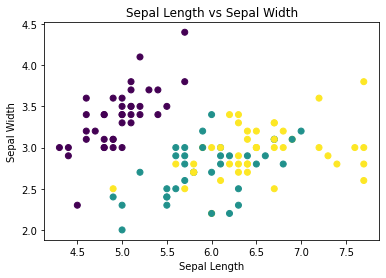

In [24]:
plt.scatter(x_train['sepal length (cm)'], x_train['sepal width (cm)'], c = y_train)
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

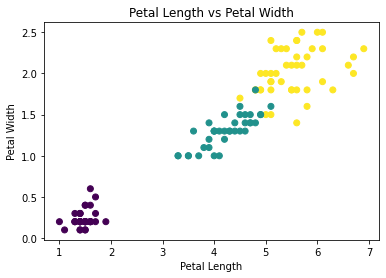

In [25]:
plt.scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c = y_train)
plt.title("Petal Length vs Petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

# kNN implementation Using Sklearn Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
model_sklearn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute')
model_sklearn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [28]:
model_sklearn.score(x_train, y_train)

0.9583333333333334

In [29]:
model_sklearn.score(np.array(x_test), np.array(y_test))

1.0

In [30]:
y_predicted = model_sklearn.predict(x_test)

In [31]:
y_predicted

array([0., 1., 1., 0., 2., 1., 2., 0., 0., 2., 1., 0., 2., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 2., 1., 0., 0., 1., 2.])

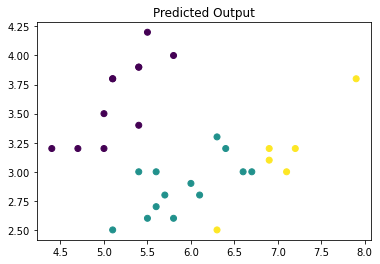

In [32]:
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = y_predicted)
plt.title("Predicted Output")
plt.show()

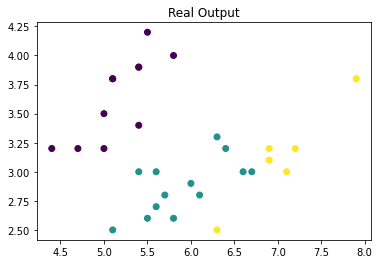

In [33]:
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = y_test)
plt.title("Real Output")
plt.show()

# Building Our kNN Model

In [34]:
def KNN(n_neighbors, points, labels, specific_point):
    distances = [] #List of all the distances
    i = 0 #Counter
    
    #Computing the distances to all the other points, with the index within the points
    
    for point in points:
        distance = sum([(point[n] - specific_point[n])**2 for n in range(len(specific_point))]) 
        distances.append([distance, i])
        i+=1
        
    distances.sort() #Sorting the distances from nearest to furthest (sorts based on first element)
    distances = distances[:n_neighbors]
    nearest_labels = []
    for distance in distances:
        point_index = distance[1]
        nearest_labels.append(labels[point_index])
    return max(set(nearest_labels), key = nearest_labels.count)

In [35]:
lst = [1, 2, 3]

In [36]:
lst[1]

2

# Implementation Using Our Model

In [37]:
output_labels = []
for item in np.array(x_test):
    output_labels.append(KNN(
    5,
    np.array(x_train),
    np.array(y_train),
    np.array(item)))
np.array(output_labels)

array([0., 1., 1., 0., 2., 1., 2., 0., 0., 2., 1., 0., 2., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 2., 1., 0., 0., 1., 2.])

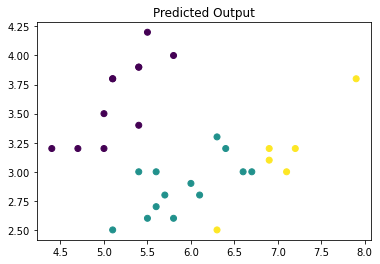

In [38]:
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = output_labels)
plt.title("Predicted Output")
plt.show()

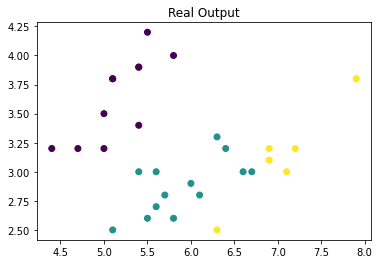

In [39]:
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = y_test)
plt.title("Real Output")
plt.show()

# k Means Clustering

## Using the sklearn model

In [40]:
from sklearn.cluster import KMeans

In [41]:
points = np.array(x_train.iloc[:, 0:2])

In [42]:
model = KMeans(n_clusters = 3)

In [43]:
model.fit(points)

KMeans(n_clusters=3)

In [44]:
labels = model.predict(points)

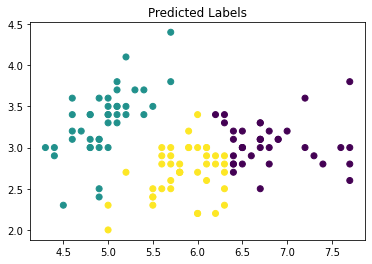

In [45]:
plt.scatter(points[:, 0], points[:, 1], c = labels)
plt.title("Predicted Labels")
plt.show()

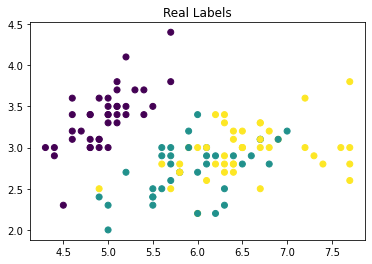

In [46]:
plt.scatter(points[:, 0], points[:, 1], c = y_train)
plt.title("Real Labels")
plt.show()

## Making our own model

In [47]:
def initialization(points, k): ## Selects random points from our given set of points
    rand_points = []
    for i in range(k):
        randomint = np.random.randint(low = 0, high = len(points) - 1)
        rand_points.append(points[randomint])
    return rand_points

In [48]:
def get_mean_points_labels(points, mean_points): ## Returns the labels of the points, and the new mean of the clusters
    k = len(mean_points)
    labels = []
    
    ## Computes the distances and labels all the other points
    
    for point in points:
        distances = []
        for mean_point in mean_points:
            if type(mean_point) != int: 
                distance = sum([(point[i] - mean_point[i])**2 for i in range(len(point))])
                distances.append(distance)
        min_distance = min(distances)
        labels.append(distances.index(min_distance))
    mean_sum = [0 for i in range(k)]
    
    ## Calculates the mean of the clusers
    
    for i in range(len(points)):
        mean_sum[labels[i]] += points[i]
    i = 0
    for item in mean_sum:
        if labels.count(i) != 0:
            item /= labels.count(i)
        i += 1
    return [np.array(labels), np.array(mean_sum)]

In [49]:
def do_steps(points, k, steps): ## Does the algorithm (step) times
    m_points = initialization(points,k)
    for i in range(steps):
        labels, m_points = get_mean_points_labels(points, m_points)
    return [labels, m_points]

In [50]:
def compute_variation(points, labels, m_points): ## Computes the variation of the clusters and sums it all together
    i = 0
    mean = [0 for k in range(len(m_points))]
    for point in points:
        mean[labels[i]] += sum([(m_points[labels[i]][j] - point[j])**2 for j in range(len(point))])
        i += 1
    
    for i in range(len(mean)):
        if labels.count(i) != 0:
            mean[i] /= labels.count(i)
    return sum(mean)

In [51]:
def k_means_clustering(points, k, tries): ## Does the clustering algorithm many times to indicate many starting conditions
    variations = []
    labels = []
    for i in range(tries):
        m_points = initialization(points, k)
        label, m_points = do_steps(points, k, 50)
        labels.append(label)
        variations.append(compute_variation(points, list(label), m_points))
    min_variation_index = variations.index(min(variations))
    return labels[min_variation_index]

# Using our kMeansClustering model

In [52]:
labels = k_means_clustering(points, 3, 50)

<ipython-input-48-458e654d2b39>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return [np.array(labels), np.array(mean_sum)]


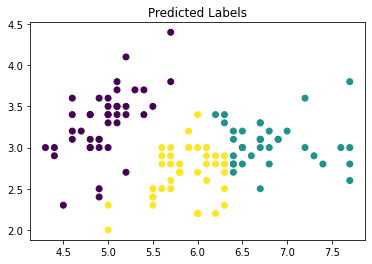

In [53]:
plt.scatter(points[:, 0], points[:, 1], c = labels)
plt.title("Predicted Labels")
plt.show()

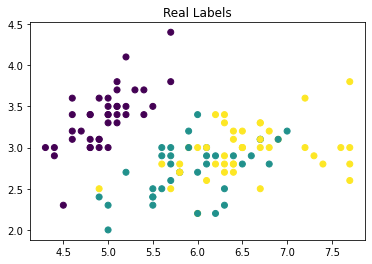

In [54]:
plt.scatter(points[:, 0], points[:, 1], c = y_train)
plt.title("Real Labels")
plt.show()

# Decision Tree Classifier using sklearn

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)

In [57]:
y_pred = classifier.predict(x_test)
y_pred

array([0., 1., 1., 0., 2., 1., 2., 0., 0., 2., 1., 0., 2., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 2., 0., 2., 1., 0., 0., 1., 2.])

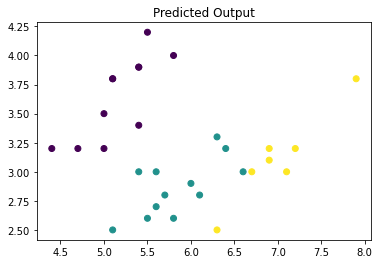

In [58]:
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = y_pred)
plt.title("Predicted Output")
plt.show()

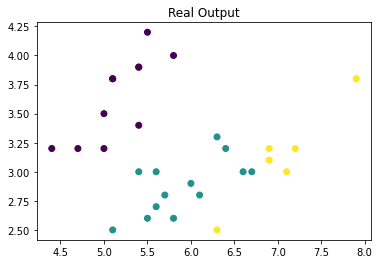

In [59]:
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = y_test)
plt.title("Real Output")
plt.show()